<a href="https://colab.research.google.com/github/emanemair/Jeeny-Graduate-Trainee-Program/blob/main/jeeny_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
# Importing the necessary packages and libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [94]:
# Loading the dataset from the specified Excel file
path="/content/sample_data/JGTP - Case Study Dataset.xlsx"
trips_data = pd.read_excel(path)

In [95]:
# Displaying the first five rows of the dataset to get an overview of the data
trips_data.head()

,Passenger ID,Trips in May '24,Total Fare of trips
0,54a0054d837819da0d8b46a1,5,30
1,54207eb8807819b11a8b45b7,1,6
2,546cbcc8a17819424c8b45a1,2,12
3,54a3cb3f847819f8528b4628,7,42
4,549c53b88478194f688b47f1,4,24


In [96]:
# Checking the dimensions of the dataset (rows, columns)

trips_data.shape

(1000, 3)

In [97]:
# Displaying a summary of the dataset, including the data types and non-null counts for each column

trips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Passenger ID         1000 non-null   object
 1   Trips in May '24     1000 non-null   int64 
 2   Total Fare of trips  1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [98]:
# Listing all the column names in the dataset

trips_data.columns

Index(['Passenger ID', 'Trips in May '24', 'Total Fare of trips'], dtype='object')

In [99]:
# Counting the number of missing values in each column of the dataset

trips_data.isnull().sum()

,0
Passenger ID,0
Trips in May '24,0
Total Fare of trips,0


In [100]:
# Generating descriptive statistics for the numerical columns in the dataset
trips_data.describe()

,Trips in May '24,Total Fare of trips
count,1000.000000,1000.000000
mean,5.104000,30.624000
std,6.804814,40.828882
min,1.000000,6.000000
25%,1.000000,6.000000
50%,2.000000,12.000000
75%,6.000000,36.000000
max,32.000000,192.000000


In [101]:
# Calculating the average number of trips per passenger across the entire dataset
average_trips_per_passenger = trips_data['Trips in May \'24'].mean()
print("Average number of trips per passenger:", average_trips_per_passenger)

Average number of trips per passenger: 5.104


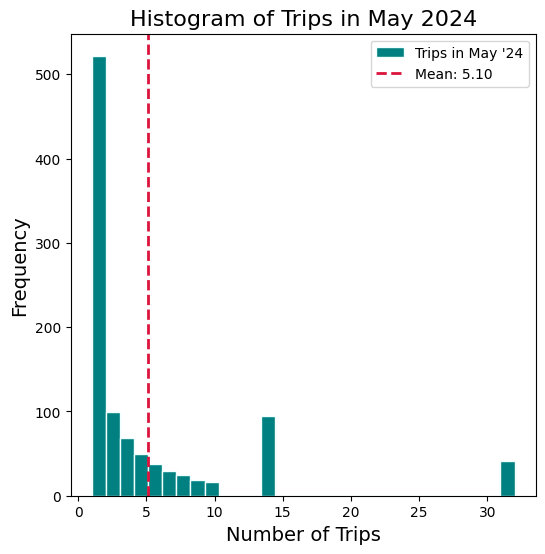

In [102]:
ax = trips_data['Trips in May \'24'].plot(kind='hist', bins=30, figsize=(6,6), color="teal", edgecolor='azure')


# Add a vertical line for the mean
ax.axvline(average_trips_per_passenger, color='crimson', linestyle='dashed', linewidth=2, label=f'Mean: {average_trips_per_passenger:.2f}')

# Add a title and axis labels
ax.set_title('Histogram of Trips in May 2024', fontsize=16)
ax.set_xlabel('Number of Trips', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [103]:
# Counting the number of passengers who took between 7 and 10 trips (inclusive) in the month
passengers_7_to_10_trips = trips_data[(trips_data['Trips in May \'24'] >=  7 ) & (trips_data['Trips in May \'24'] <= 10)].shape[0]
print(f"number of passengers who took between 7 and 10 trips (inclusive) in the month : {passengers_7_to_10_trips}")


number of passengers who took between 7 and 10 trips (inclusive) in the month : 88


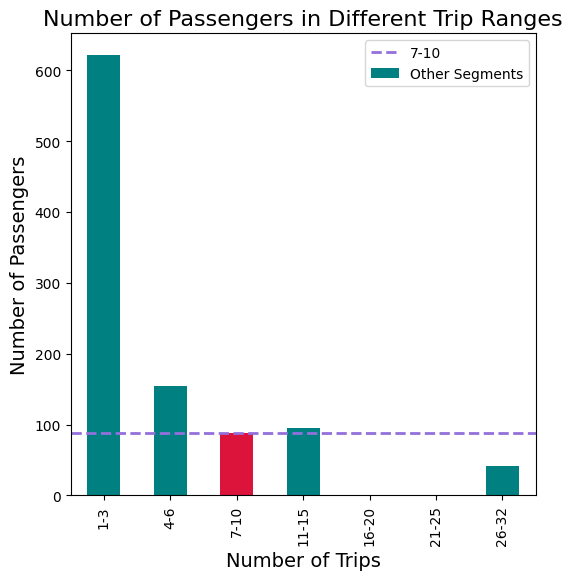

In [122]:
bins = [0, 3, 6, 10, 15, 20, 25, 32]
labels = ['1-3', '4-6', '7-10', '11-15', '16-20', '21-25', '26-32']
trips_data['Trip Range'] = pd.cut(trips_data['Trips in May \'24'], bins=bins, labels=labels, right=True)
trip_counts = trips_data['Trip Range'].value_counts().reindex(labels)

# Highlight the 7-10 trips segment

highlight_segment = '7-10'
highlight_color = 'crimson'
ax = trip_counts.plot(kind='bar', figsize=(6,6), color=[highlight_color if label == highlight_segment else 'teal' for label in trip_counts.index])
ax.axhline(y=passengers_7_to_10_trips, color='mediumpurple', linestyle='dashed', linewidth=2, label=f'Highlight Value:{passengers_7_to_10_trips}' )

# Add a title and axis labels
ax.set_title('Number of Passengers in Different Trip Ranges', fontsize=16)
ax.set_xlabel('Number of Trips', fontsize=14)
ax.set_ylabel('Number of Passengers', fontsize=14)

# Add a legend
ax.legend([highlight_segment, 'Other Segments'], loc='upper right')

# Show the plot
plt.show()

In [105]:
trips_data = pd.read_excel(path)


In [106]:
# Calculating the percentage of Jeeny's total revenue that was generated by passengers who took between 3 and 5 trips (inclusive) in the month
# This involves:
# 1. Summing the total revenue across all passengers.
# 2. Summing the revenue from passengers who took between 3 and 5 trips.
# 3. Calculating the percentage of the latter relative to the total revenue.

total_revenue = trips_data['Total Fare of trips'].sum()
print(f"Total Revenue among all Trips: ${total_revenue}")

Total Revenue among all Trips: $30624


In [107]:
paseenger_3_5_trips = trips_data[(trips_data['Trips in May \'24'] >= 3) & (trips_data['Trips in May \'24'] <= 5)]
revenue_3_5_trips = paseenger_3_5_trips['Total Fare of trips'].sum()
print(f"Total Revenue among passengers who took between 3 and 5 trips: ${revenue_3_5_trips}")

Total Revenue among passengers who took between 3 and 5 trips: $4884


In [108]:
percentage_revenue_3_to_5_trips  = (revenue_3_5_trips / total_revenue) * 100
print(f"Percentage of Revenue generated by passengers who took between 3 and 5 trips: {percentage_revenue_3_to_5_trips:.2f}%")

Percentage of Revenue generated by passengers who took between 3 and 5 trips: 15.95%


In [109]:
trip_ranges = {
    '1 to 2 Trips': (1, 2),
    '3 to 5 Trips': (3, 5),
    '6 to 10 Trips': (6, 10),
    '11+ Trips': (11, 32)
}

In [110]:
# Calculating the percentage of total revenue for each trip range
percentage_revenue = {}


for range_label, (min_trips, max_trips) in trip_ranges.items():
    # Calculate revenue for the specific trip range
    revenue_in_range = trips_data[(trips_data['Trips in May \'24'] >= min_trips) & (trips_data['Trips in May \'24'] <= max_trips)]['Total Fare of trips'].sum()
    # Calculate the percentage of total revenue
    percentage_revenue[range_label] =(revenue_in_range / total_revenue) * 100


In [111]:
revenue_df = pd.DataFrame(list(percentage_revenue.items()), columns=['Trip Range', 'Percentage of Revenue'])
revenue_df

,Trip Range,Percentage of Revenue
0,1 to 2 Trips,13.597179
1,3 to 5 Trips,15.948276
2,6 to 10 Trips,18.691223
3,11+ Trips,51.763323


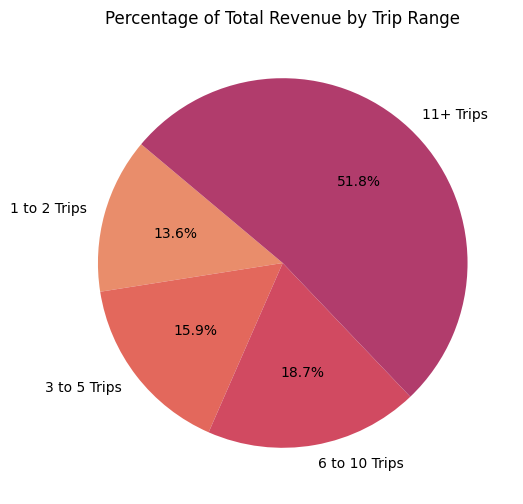

In [123]:
# Plotting the percentage of revenue for each trip range using a pie chart

plt.figure(figsize=(6,6))
plt.pie(
    percentage_revenue.values(),
    labels=percentage_revenue.keys(),
    autopct='%1.1f%%',
    colors=sns.color_palette("flare" ),
    startangle=140  # Optional: Rotate the start angle for better visualization
)
# Adding a title
plt.title('Percentage of Total Revenue by Trip Range')

# Display the plot
plt.show()


In [113]:
trips_data

,Passenger ID,Trips in May '24,Total Fare of trips
0,54a0054d837819da0d8b46a1,5,30
1,54207eb8807819b11a8b45b7,1,6
2,546cbcc8a17819424c8b45a1,2,12
3,54a3cb3f847819f8528b4628,7,42
4,549c53b88478194f688b47f1,4,24
...,...,...,...
995,54505a5d8278199f148b45e0,1,6
996,54a497608278199c088b461d,32,192
997,54a01909857819cb118b456d,5,30
998,54a497608278199c088b461d,32,192


In [114]:
# Filtering the data to get the fare of trips where the number of trips is 1
trip_cost = trips_data[trips_data[	'Trips in May \'24'] == 1]['Total Fare of trips'].mean()

In [115]:
# Printing the average cost per trip
print(f"The average cost for a trip with 1 trip is: ${trip_cost:.2f}")

The average cost for a trip with 1 trip is: $6.00


In [126]:
import math
# Define the variables
subscription_price = 5
discount_percentage = 0.10
cost_per_ride = trip_cost

# Calculate the discounted cost per ride
discounted_cost_per_ride = cost_per_ride *  (1- discount_percentage)
# The portion of the original price that the customer will pay after applying the discount
# For example, if discount_percentage is 0.10 (10%), then (1 - discount_percentage) is 0.90 (90%)

#-----------------------------------------------------------------------
# Calculate the number of trips required to make the subscription financially sensible
number_of_trips = math.ceil(subscription_price / (cost_per_ride - discounted_cost_per_ride))



print(f"Number of trips required to make the subscription worthwhile: {number_of_trips} trips ")
print(cost_per_ride)

Number of trips required to make the subscription worthwhile: 9 trips 
6.0


In [117]:
discounted_cost_per_ride

5.4

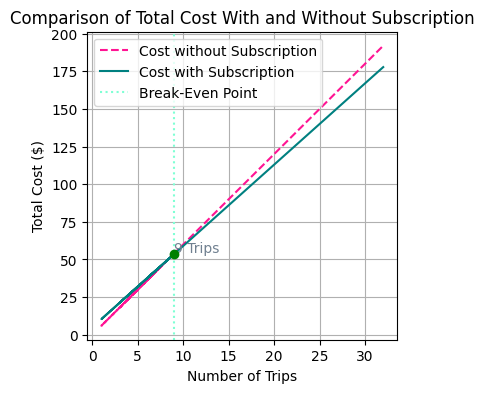

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Define the variables
subscription_price = 5
discount_percentage = 0.10
cost_per_ride = trips_data[trips_data['Trips in May \'24'] == 1]['Total Fare of trips'].mean()

# Calculate the discounted cost per ride
discounted_cost_per_ride = cost_per_ride * (1 - discount_percentage)

# Define a range of trips to plot
trips = pd.Series(trips_data['Trips in May \'24'].unique())  # Adjust the range as needed

# Calculate total cost with and without subscription
cost_without_subscription = trips * cost_per_ride
cost_with_subscription = subscription_price + trips * discounted_cost_per_ride


# Plotting
plt.figure(figsize=(4,4))
plt.plot(trips, cost_without_subscription, label='Cost without Subscription', color='deeppink', linestyle='--')
plt.plot(trips, cost_with_subscription, label='Cost with Subscription', color='teal')
plt.axvline(x=number_of_trips, color='aquamarine', linestyle=':', label='Break-Even Point')

# Highlight the break-even point
plt.scatter(number_of_trips, subscription_price + number_of_trips * discounted_cost_per_ride, color='green', zorder=5)
plt.text(number_of_trips, subscription_price + number_of_trips * discounted_cost_per_ride + 1, f'{number_of_trips} Trips', color='slategrey')

# Labels and title
plt.xlabel('Number of Trips')
plt.ylabel('Total Cost ($)')
plt.title('Comparison of Total Cost With and Without Subscription')
plt.legend()
plt.grid(True)
# Show the plot
plt.show()



In [119]:
def price(n):
  if n < 10 :
    return 5 + n * discounted_cost_per_ride
  else :
    return 5 + 10* discounted_cost_per_ride  + (n -10 ) * cost_per_ride

trips_data['total fare with subscription'] = trips_data['Trips in May \'24'].apply(price)

trips_data.head(5)


,Passenger ID,Trips in May '24,Total Fare of trips,total fare with subscription
0,54a0054d837819da0d8b46a1,5,30,32.0
1,54207eb8807819b11a8b45b7,1,6,10.4
2,546cbcc8a17819424c8b45a1,2,12,15.8
3,54a3cb3f847819f8528b4628,7,42,42.8
4,549c53b88478194f688b47f1,4,24,26.6


In [120]:
plot_data = pd.DataFrame({
    'Fare Type': ['Total Fare of trips', 'total fare with subscription'],
    'Total Sum': [trips_data["Total Fare of trips"].sum(), trips_data["total fare with subscription"].sum()]
})

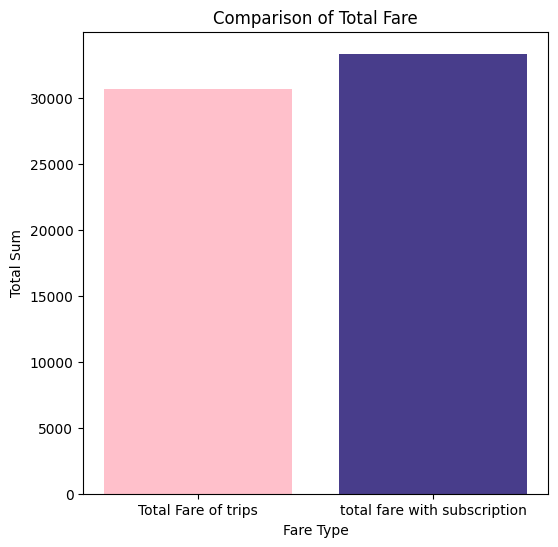

In [127]:
plt.figure(figsize=(6,6))
plt.bar(plot_data['Fare Type'], plot_data['Total Sum'], color=['pink', 'darkslateblue'])
plt.title('Comparison of Total Fare')

plt.xlabel('Fare Type')
plt.ylabel('Total Sum')
plt.show()